# Young's Modulus

In this notebook, you will learn how to graph data and do a linear curve fit to the data using Python. Using a programming language to read and analyze data is a technique you will use throughout your career as a scientist. (This is a *premier life skill* in science.)

We are using a Google app called Colaboratory, or Colab for short. Google colab reads a Jupyter notebook file that has formatted text and runnable Python code in text and code cells, respectively.

# Save to Google Drive

Before continuing, click the icon in the toolbar to `Copy to Drive`. This will copy the notebook to your Google Drive and will save it automatically as you work on it. **If you do not do this, then you will lose your work when closing the tab.**

# Running Code in Colab

To run a code cell in Google Colab, press `shift-enter` on your keyboard. (In other words, while holding down the `shift` key, press the `enter` or `return` key.) In fact, pressing shift-enter is one way to move downward, cell by cell through the notebook, running one code cell at a time.

Start by clicking on the next code cell to import packages and pressing `shift-enter` on your keyboard. An icon will show you when the code in the cell finishes running. Then continue reading (and sometimes editing) and pressing `shift-enter` for each subsequent cell in the notebook.

# Import packages

In [1]:
import pandas as pd #used for reading and processing data
import numpy as np #used for arrays
import matplotlib.pyplot as plt #used for graphing
from io import StringIO #used to convert a string to a pandas dataframe
from IPython.display import YouTubeVideo #used to embed a YouTube video

# Type Data Into a Code Cell

In Google Colab, it is most convenient to type your data into a code cell, using commas to separate the data. Because Google Colab converts all tabs to spaces, it is best to use comma-delimited data.

Type your measured data into the cell below between the `"""` marks. Data is separated by commas **with no spaces**. The first row contains the headings for your data, in this case strain and stress. The numbers below are used for example. You should replace each row of data with your own data, and add additional rows as necessary.

In [2]:
data = StringIO("""stress (N/m^2),strain,uncertainty in strain
7.68e7,1.14e-3,0.11e-3
1.54e8,1.7e-3,0.11e-3
2.3e8,2.37e-3,0.11e-3
""") 

# Plot the strain as a function of stress.

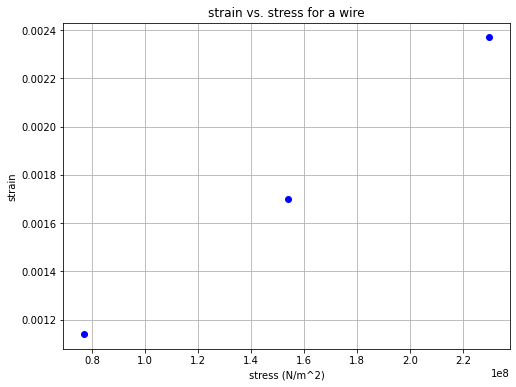

In [3]:
# read the data into a pandas dataframe
df = pd.read_csv(data, sep=',')
df.head()

# assign variable names to the columns of data; these variables are lists
stress = df['stress (N/m^2)']
strain = df['strain']
unc = df['uncertainty in strain']

# plot data
fig = plt.figure(figsize=(8,6))
plt.title("strain vs. stress for a wire")
plt.xlabel('stress (N/m^2)')
plt.ylabel('strain')
plt.plot(stress, strain, 'bo')
plt.grid(which='both', axis='both')
plt.show()

# Do a linear fit

The numpy `polyfit(x,y,degree)` function takes data for the independent variable `x` and dependent variable `y` and returns a polynomial of the `degree` we want. The degree corresponds to the highest exponent of the independent variable. For example here are functions of degree 1, degree 2, and degree 3, respectively:

$$\mathrm{degree\ 1:} \qquad y = ax + b$$

$$\mathrm{degree\ 2:} \qquad y = ax^2 + bx + c$$

$$\mathrm{degree\ 3:} \qquad y = ax^3 + bx^2 + cx + d$$

For a linear fit, we want degree 1. The function will return the values of the coefficients `a` and `b`, in this case. The slope is the coefficient `a`.

In [4]:
# find the best-fit parameters
a,b = np.polyfit(stress,strain,1) #1st degree polynomial fit

# print the best-fit parameters
print("Slope = ",a)
print("Intercept = ",b)

Slope =  8.026681754969597e-12
Intercept =  0.000503768349103337


# Plot the best-fit line and data

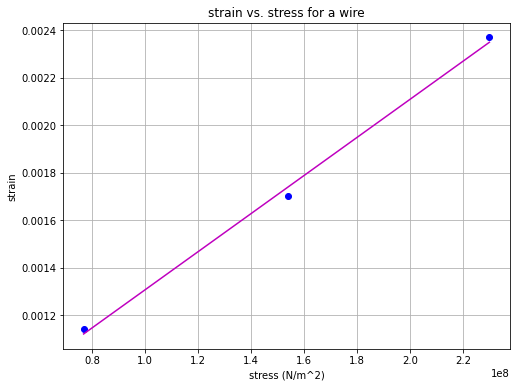

In [5]:
# Calculate points for the line determined by the curve-fit parameters
xfit = np.linspace(np.min(stress),np.max(stress),100) # dependent variable used for drawing a best-fit line
yfit = a*xfit + b # independent variable used for drawing a best-fit line

# Plot the best-fit line and the data on the same axes
fig = plt.figure(figsize=(8,6))
plt.title("strain vs. stress for a wire")
plt.xlabel('stress (N/m^2)')
plt.ylabel('strain')
plt.plot(stress, strain, 'bo')
plt.plot(xfit, yfit, 'm-')
plt.grid(which='both', axis='both')
plt.show()

# Error bars

It is good scientific practice to draw error bars showing the uncertainty in your data. Watch [this short video](https://www.youtube.com/watch?v=u_gggKHvfGw) showing the position of a star orbiting the black hole at the center of the Milky Way galaxy. (Run the cell below to view the video in the notebook.)

At the end of the video, notice the error bars on the measurements of the position of the star. The error bars give us confidence in the curve fit for the path of the star. Error bars (and uncertainty in general) is essential to reporting experimental results.

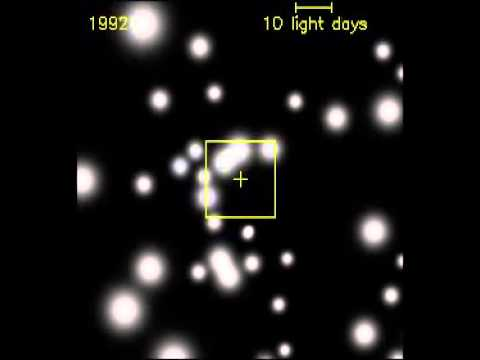

In [6]:
#The shortened URL is https://youtu.be/tlfaKQqFpcA
#Get the video_id from the YouTube URL
YouTubeVideo('u_gggKHvfGw')

# Plot error bars on your graph

The uncertainty column in the dataset will be used to draw error bars.

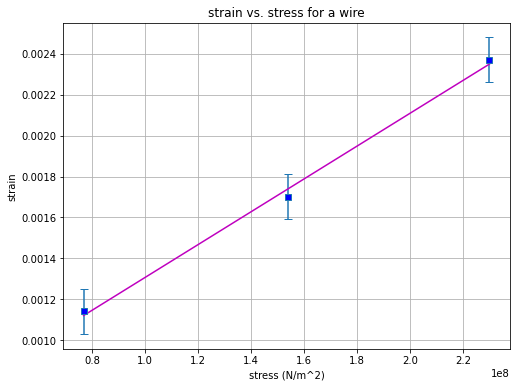

In [7]:
# Plot the best-fit line and the data on the same axes with error bars
fig = plt.figure(figsize=(8,6))
plt.title("strain vs. stress for a wire")
plt.xlabel('stress (N/m^2)')
plt.ylabel('strain')
plt.plot(xfit, yfit, 'm-')
plt.errorbar(stress, strain, yerr=unc, marker='s', markerfacecolor='blue', markersize=6, capsize=4, ls='none')
plt.grid(which='both', axis='both')
plt.show()

# Calculate Young's Modulus

The slope was defined as the variable `a`. Use the slope to calculate Young's Modulus and print the result. You should use Python, not a calculator, to calculate Young's modulus. Write your calculation below and print the result.

In [8]:
Y = 1/a
print(Y)

124584483417.55487


Although the slope is calculated to many decimal places, our measurement of the scale reading was to the nearest tenth of a mm. So the scale reading (2.7 mm in the first trial) was only known to two significant figures. Therefore, Young's modulus can only be reported to two significant figures.

Here is an example of how to print a variable in scientific notation with one decimal place (two significant figures). Follow this example to print Young's modulus to two significant figures.

```
c = 299792458
print("The speed of light to one decimal place is {:.1e}".format(c))
```

In [9]:
print("Young's modulus for brass = {:.1e} N/m^2".format(Y))

Young's modulus for brass = 1.2e+11 N/m^2
